### Import packages

In [34]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from scipy import spatial
import numpy as np
from keras.models import Model

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [57]:
#image file directory
image_path = '/content/gdrive/MyDrive/dataset/project5-dataset'
dataset = '/content/gdrive/MyDrive/dataset/img_sim_dataset.csv'

### Loading Images

In [38]:
def load_images():
        '''
        function: to path the input images directory and create list of image name
        '''
        images=[]
        file_path = os.listdir(image_path)
        for image in file_path:
            images.append(image)
        images.sort()
        #if condition returns False, AssertionError is raised:
        assert len(images) != 0, "No images found"
        return images

### Preprocessing Images
+ the load_img() function for loading an image from file as a PIL image object
+ Keras provides the img_to_array() function for converting a loaded image in PIL format into a NumPy array for use with deep learning models
+ np.expand_dims expands the shape of an array.
+ The preprocess_input function is meant to adequate your image to the format the model requires.


In [42]:

def preprocess_image(image_name):
        ''' function: to convert input images into numpy array and preprocess it
        
                parameter: image file path

                return: image that is in model reuired format
        '''
        directory = Path(image_path)
        abs_file_path = directory / image_name
        img = load_img(abs_file_path, target_size=(224, 224))
        image_array = img_to_array(img)
        img_expand = np.expand_dims(image_array, axis=0)
        preprocessed_img = preprocess_input(img_expand)
        return preprocessed_img


### Feature Vector Embedding
+ Used VGG16 pretrained model to extract features
+ we copy the model, but remove the last layer (the classification layer),fc2 dense. the embedded vector size becomes (4096,).


In [43]:
def feature_extractor(images: list):
        ''' function: using pretrained VGG16 model to extract features. 
    
                parameter: list of images

                return: list of embedded vectors for each images
        '''
        features=[]
        #load a previously-trained neural network, that of VGG16, which comes with Keras.
        model = VGG16(weights='imagenet', include_top=True)
        #we copy the model, but remove the last layer (the classification layer),fc2 dense (4096,)
        feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
        # use VGG to extract features
        for image_name in images:
          x = preprocess_image(image_name)
          vgg_feat = feat_extractor.predict(x)[0]
          features.append(vgg_feat)
        return np.array(features)

### Image Similarity
+ cosine similarity measures the similarity between two vectors of an inner product space.

In [31]:
def calculate_similarity(vector1, vector2):
 return 1-spatial.distance.cosine(vector1, vector2)

In [44]:
#Calling the function load_images() and feature_extractor() to generate embedded vectors
image_list = load_images()
feat = feature_extractor(image_list)


['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg']


Loading all images for similarity test. 
The dataset consists of 30 images and 4 classes:

Apple, Strawberry, Dog and Cat

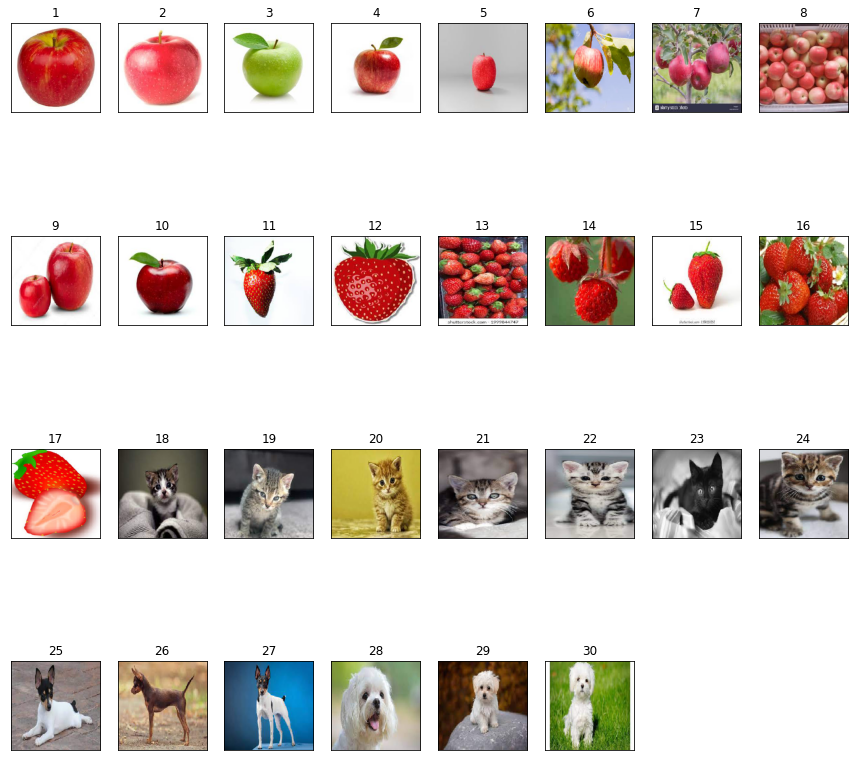

In [63]:
c = 8
r = len(image_list) // c + 1
plt.figure(figsize=(15,15))
directory = Path(image_path)
for i, file_name in enumerate(image_list):
    abs_file_path = directory / file_name
    img = image.load_img(abs_file_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x.astype('float32') / 255
    plt.subplot(r, c, i+1)
    plt.title(i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x)

In [64]:
similarity_score = calculate_similarity(feat[0], feat[1]) #Both are apples
similarity_score

0.641895055770874

In [65]:
similarity_score = calculate_similarity(feat[11], feat[27]) #first image is strawberry and second is dog
similarity_score

0.16490435600280762

Similarity score of similar class images are relatively high than with disimilar class images.